In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

#from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv(r"C:\Users\eesha\Downloads\Hotel Reservations (1) - Hotel Reservations (1).csv")
df=data.copy()
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Data Dictionary
- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or
booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to
stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered
(encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the
customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the
customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are
dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high
floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [3]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

We have no missing Values

In [5]:
duplicates = df.duplicated().sum()
duplicates

0

We have no Duplicates

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
for column in df:
    print("Column", " ",column," Unique Values are : ", df[column].nunique())
    print(df[column].unique())
    print("........................")

Column   Booking_ID  Unique Values are :  36275
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
........................
Column   no_of_adults  Unique Values are :  5
[2 1 3 0 4]
........................
Column   no_of_children  Unique Values are :  6
[ 0  2  1  3 10  9]
........................
Column   no_of_weekend_nights  Unique Values are :  8
[1 2 0 4 3 6 5 7]
........................
Column   no_of_week_nights  Unique Values are :  18
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
........................
Column   type_of_meal_plan  Unique Values are :  4
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
........................
Column   required_car_parking_space  Unique Values are :  2
[0 1]
........................
Column   room_type_reserved  Unique Values are :  7
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
........................
Column   lead_time  Unique Values are :  352


In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


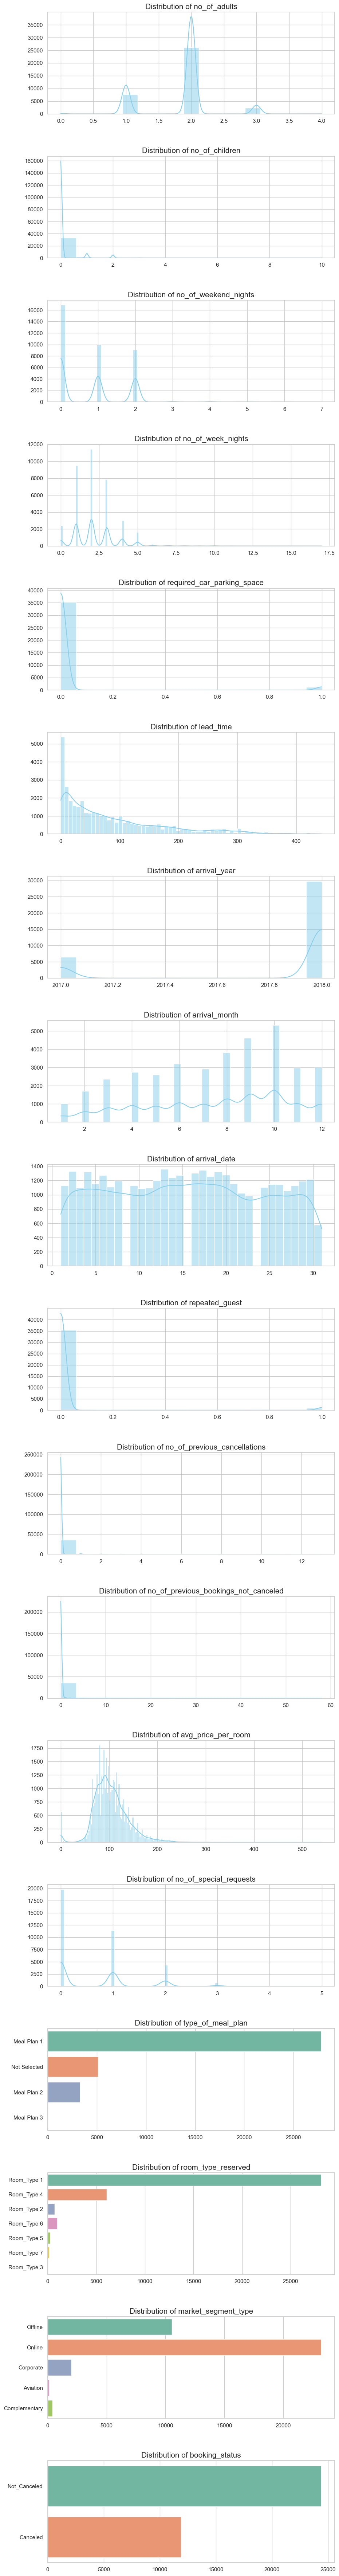

In [102]:
sns.set(style="whitegrid")
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('Booking_ID')

n_rows = len(numeric_cols) + len(categorical_cols)
n_cols = 1 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))
fig.tight_layout(pad=5.0)
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for j, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=data, ax=axes[len(numeric_cols) + j], palette='Set2')
    axes[len(numeric_cols) + j].set_title(f'Distribution of {col}', fontsize=15)
    axes[len(numeric_cols) + j].set_xlabel('')
    axes[len(numeric_cols) + j].set_ylabel('')

plt.show()

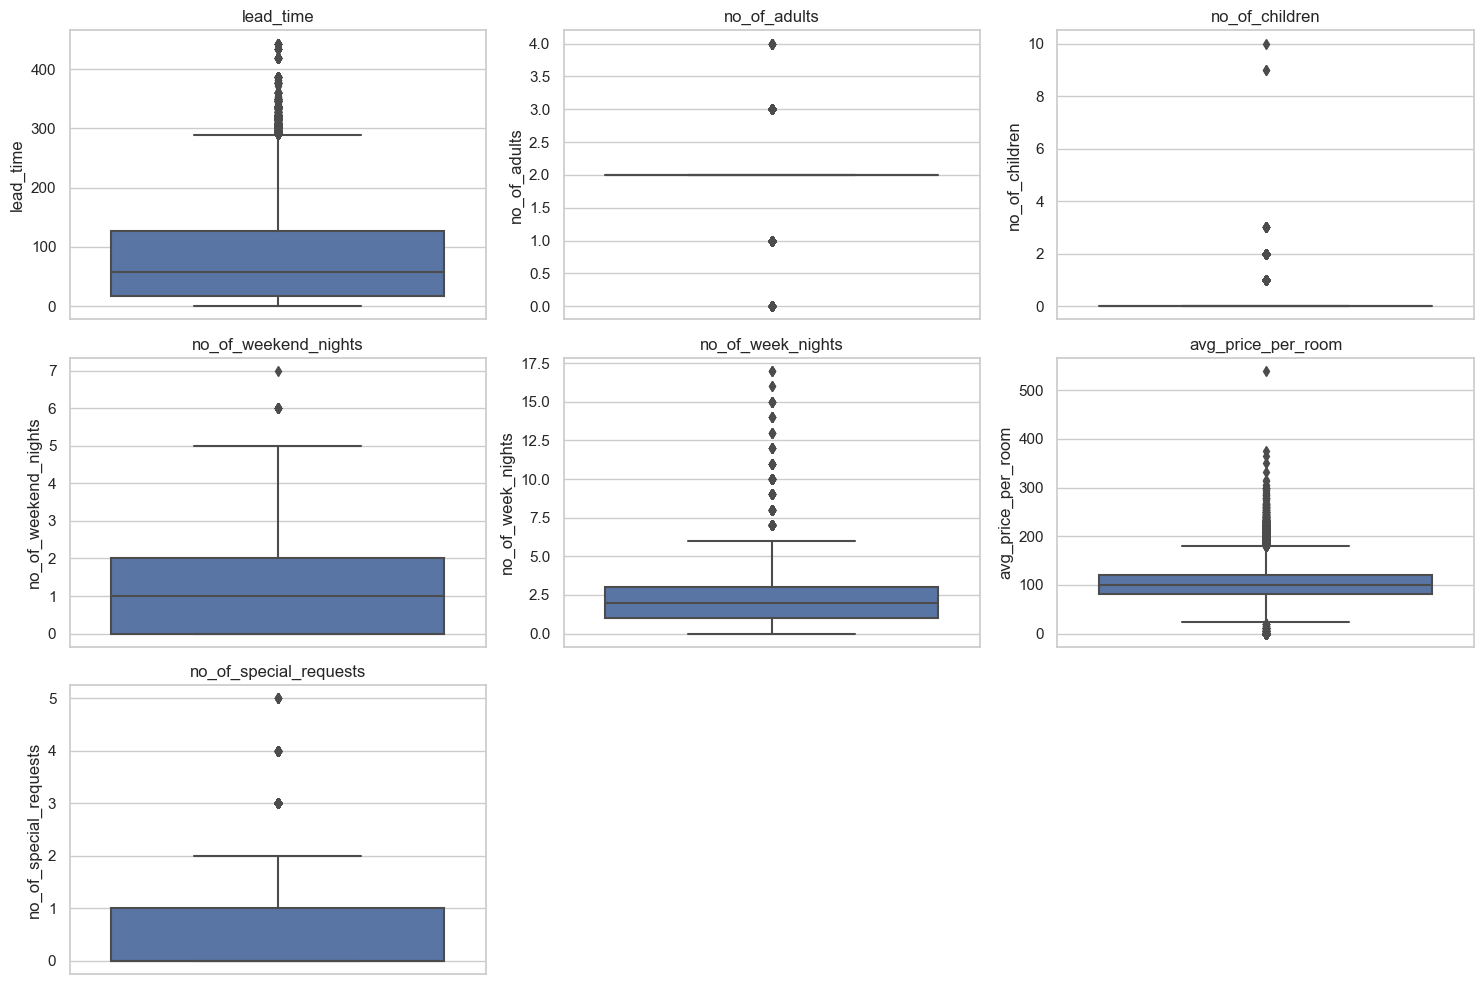

In [9]:
columns_to_check= ['lead_time', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
                    'no_of_week_nights', 'avg_price_per_room', 'no_of_special_requests']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

"avg_price_per_room" is the only column whose outliers seem unjustifyable to me, so i'll check for it's correlation with other features to see if it makes sense. Rest of the Outliers fit the context

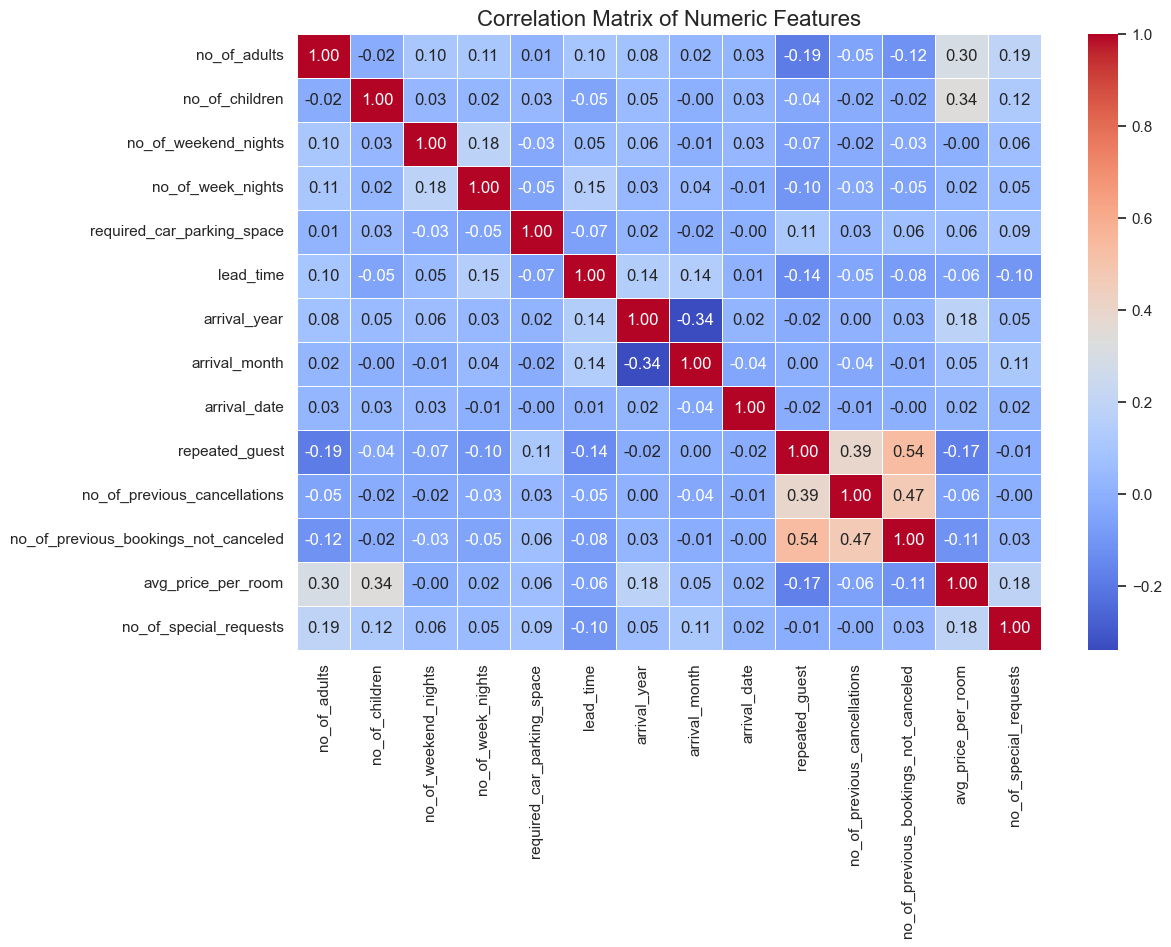

In [103]:
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled) show low numerical correlation with other features. The impact of being a repeated guest on other factors like pricing might require deeper categorical analysis. no_of_special_requests has very low correlation with other numerical features, so demand for special requests is relatively independent of the other numerical factors considered here.

In [10]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Extracting the correlation values of 'avg_price_per_room' with other features
avg_price_correlation = correlation_matrix['avg_price_per_room'].sort_values(ascending=False)

avg_price_correlation

avg_price_per_room                      1.000000
no_of_children                          0.337728
no_of_adults                            0.296886
no_of_special_requests                  0.184381
arrival_year                            0.178605
required_car_parking_space              0.061304
arrival_month                           0.054423
no_of_week_nights                       0.022753
arrival_date                            0.017898
no_of_weekend_nights                   -0.004525
lead_time                              -0.062596
no_of_previous_cancellations           -0.063340
no_of_previous_bookings_not_canceled   -0.113684
repeated_guest                         -0.174900
Name: avg_price_per_room, dtype: float64

The moderate positive correlations with "no_of_adults" & "no_of_children" suggest that larger room types 
or family bookings might have higher prices.
The weak negative correlations: a repeated guest or having previous bookings might be associated with lower
average prices, can be loyalty discounts/cost-effective booking strategies.

encoding of the nominal categorical columns 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'.
ensuring that we drop booking_ID and booking_status

In [11]:
one_hot_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
encoded_df = pd.get_dummies(df, columns=one_hot_columns)

cols_to_convert = encoded_df.columns.drop(['Booking_ID', 'booking_status'])
encoded_df[cols_to_convert] = encoded_df[cols_to_convert].astype(int)
pd.set_option('display.max_columns', None)
encoded_df #hot encoded dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,0,0,0,65,0,Not_Canceled,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,5,2018,11,6,0,0,0,106,1,Not_Canceled,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,INN00003,1,0,2,1,0,1,2018,2,28,0,0,0,60,0,Canceled,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,0,211,2018,5,20,0,0,0,100,0,Canceled,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,48,2018,4,11,0,0,0,94,0,Canceled,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,85,2018,8,3,0,0,0,167,1,Not_Canceled,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
36271,INN36272,2,0,1,3,0,228,2018,10,17,0,0,0,90,2,Canceled,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
36272,INN36273,2,0,2,6,0,148,2018,7,1,0,0,0,98,2,Not_Canceled,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
36273,INN36274,2,0,0,3,0,63,2018,4,21,0,0,0,94,0,Canceled,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


Label encoding the target variable into binary form 

In [12]:
label_encoder = LabelEncoder()
encoded_df['booking_status'] = label_encoder.fit_transform(encoded_df['booking_status'])

pd.set_option('display.max_columns', None)
encoded_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,0,0,0,65,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,5,2018,11,6,0,0,0,106,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,INN00003,1,0,2,1,0,1,2018,2,28,0,0,0,60,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,0,211,2018,5,20,0,0,0,100,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,48,2018,4,11,0,0,0,94,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


Setting Booking_ID as index

In [13]:
encoded_df.set_index('Booking_ID', inplace=True)

Applying Decision Tree first since it doesn't require Standardization/normalization

Determining features, target variable: booking status

In [14]:
X = encoded_df.drop('booking_status', axis=1)  # Our Features
y = encoded_df['booking_status']               # Our target variable

Splitting the dataframe into test and train samples. sticking with the standard splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
Booking_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INN29581,2,0,1,3,0,200,2018,8,29,0,0,0,90,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
INN06326,2,0,1,3,0,79,2018,3,24,0,0,0,90,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
INN33900,2,0,1,4,0,78,2018,4,6,0,0,0,99,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
INN00721,2,0,2,0,0,61,2017,10,4,0,0,0,91,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
INN22121,2,1,0,4,0,201,2018,11,1,0,0,0,82,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN16851,2,0,2,2,0,43,2017,12,26,0,0,0,55,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
INN06266,1,0,0,2,0,102,2017,10,16,0,0,0,80,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
INN11285,2,0,0,2,0,5,2018,5,24,0,0,0,110,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [17]:
y_train

Booking_ID
INN29581    0
INN06326    0
INN33900    1
INN00721    1
INN22121    1
           ..
INN16851    1
INN06266    0
INN11285    1
INN00861    0
INN15796    1
Name: booking_status, Length: 25392, dtype: int32

Initializing the model

In [18]:
decision_tree = DecisionTreeClassifier(random_state=42)

Compiling the model

In [19]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = decision_tree.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

The obtained results of Decision Tree model

In [59]:
accuracy_dt = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy_dt

0.8639161995773225

In [60]:
conf_matrix

array([[2921,  686],
       [ 795, 6481]], dtype=int64)

In [104]:
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3607
           1       0.90      0.89      0.90      7276

    accuracy                           0.86     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.86      0.86     10883



With decision tree model successfully implemented. we will now move on to KNN model. firstly we need to carry out normalization

In [24]:
scaler = MinMaxScaler()

Determining features for normalization and identifying the target variable: booking status

In [25]:
features = encoded_df.drop('booking_status', axis=1)
X_normalized = scaler.fit_transform(features)
y = encoded_df['booking_status']

Splitting the dataframe into test and train samples. sticking with the standard splitting

In [26]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [27]:
X_train_norm

array([[0.5       , 0.        , 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [28]:
y_train

Booking_ID
INN29581    0
INN06326    0
INN33900    1
INN00721    1
INN22121    1
           ..
INN16851    1
INN06266    0
INN11285    1
INN00861    0
INN15796    1
Name: booking_status, Length: 25392, dtype: int32

Initializing and compiling the KNN model

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [30]:
y_pred_knn = knn.predict(X_test_norm)
y_pred_knn

array([1, 1, 1, ..., 1, 0, 0])

The obtained results of KNN model

In [31]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

In [32]:
accuracy_knn

0.8511439860332629

In [33]:
conf_matrix_knn

array([[2672,  935],
       [ 685, 6591]], dtype=int64)

In [105]:
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3607
           1       0.88      0.91      0.89      7276

    accuracy                           0.85     10883
   macro avg       0.84      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883



Importing imbalance learning library and SMOTE

In [35]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\eesha\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\eesha\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\eesha\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\eesha\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\eesha\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\eesha\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eesha\anaconda3\Lib\site-packages\pip\_vend

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


Initialize the SMOTE model, and spliting the dataset 

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_norm, y_train)

Training Decision Tree with SMOTE data

In [38]:
decision_tree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

Training KNSS with SMOTE data

In [39]:
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

Predicting SMOTE-data-trained Decision Tree 

In [40]:
y_pred_dt_smote = decision_tree.predict(X_test)
y_pred_dt_smote

array([1, 1, 1, ..., 1, 1, 1])

Evaluating SMOTE-data-trained Decision Tree

In [41]:
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
conf_matrix_dt_smote = confusion_matrix(y_test, y_pred_dt_smote)
class_report_dt_smote = classification_report(y_test, y_pred_dt_smote)

In [42]:
accuracy_dt_smote

0.5775980887622898

In [43]:
conf_matrix_dt_smote

array([[ 300, 3307],
       [1290, 5986]], dtype=int64)

In [106]:
print(class_report_dt_smote)

              precision    recall  f1-score   support

           0       0.19      0.08      0.12      3607
           1       0.64      0.82      0.72      7276

    accuracy                           0.58     10883
   macro avg       0.42      0.45      0.42     10883
weighted avg       0.49      0.58      0.52     10883



Predicting SMOTE-data-trained KNN

In [45]:
y_pred_knn_smote = knn.predict(X_test_norm)
y_pred_knn_smote

array([1, 1, 1, ..., 1, 0, 0])

Evaluating SMOTE-data-trained KNN Model

In [46]:
accuracy_knn_smote = accuracy_score(y_test, y_pred_knn_smote)
conf_matrix_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)
class_report_knn_smote = classification_report(y_test, y_pred_knn_smote)

In [47]:
accuracy_knn_smote 

0.8328585867867316

In [48]:
conf_matrix_knn_smote 

array([[2996,  611],
       [1208, 6068]], dtype=int64)

In [107]:
print(class_report_knn_smote) 

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      3607
           1       0.91      0.83      0.87      7276

    accuracy                           0.83     10883
   macro avg       0.81      0.83      0.82     10883
weighted avg       0.84      0.83      0.84     10883



The decrease in accuracy for both Decision Tree and KNN models after applying SMOTE suggests that these models are now giving more attention to the minority class. The Decision Tree's accuracy dropping from 86% to 58% indicates a high sensitivity to class imbalance. This model might have initially overfitted to the majority class.
The KNN model's performance decrease from 85% to 83% is relatively smaller, suggesting it might be more robust to class imbalance compared to the Decision Tree.

# Questions

Question 1: What is the distribution of the number of adults per booking?

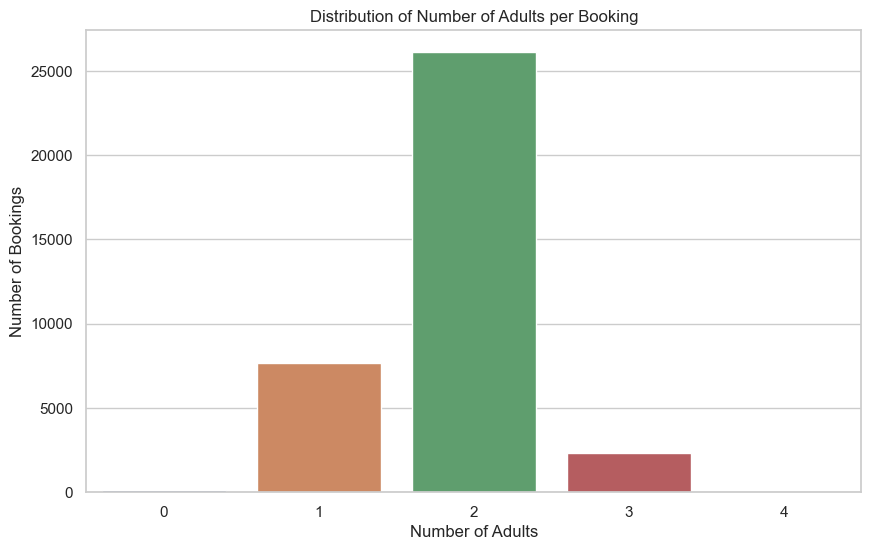

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_adults', data=df)
plt.title('Distribution of Number of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Bookings')
plt.show()

Question 2: How does the lead time affect the likelihood of cancellation?

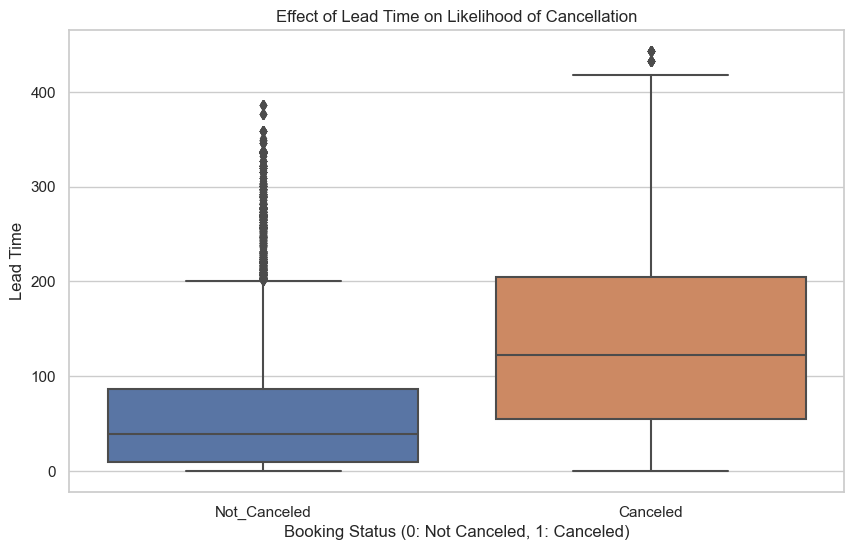

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Effect of Lead Time on Likelihood of Cancellation')
plt.xlabel('Booking Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Lead Time')
plt.show()

The median lead time for canceled bookings is higher than that for non-canceled bookings. This shows that bookings made well in advance are more likely to being canceled.
There are outliers present in both categories, especially for canceled bookings. This shows that there are some bookings with an exceptionally high lead time that still get canceled.

Question 3: Which model has the best accuracy?

In [86]:
models = ['Decision Tree', 'KNN']
accuracies_simple = [accuracy_dt, accuracy_knn] # replace with real values [86, 85]
accuracies_smote = [accuracy_dt_smote, accuracy_knn_smote] # replace with real values [57, 83]

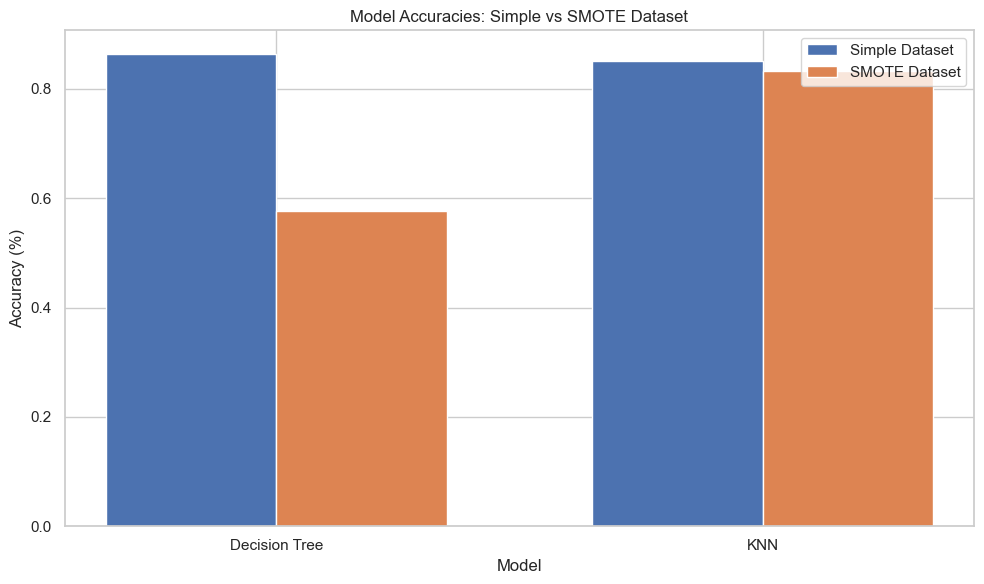

([0.8639161995773225, 0.8511439860332629],
 [0.5775980887622898, 0.8328585867867316])

In [96]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))
bar1 = plt.bar(index, accuracies_simple, bar_width, label='Simple Dataset') #simple dataset accuracies
bar2 = plt.bar(index + bar_width, accuracies_smote, bar_width, label='SMOTE Dataset')#SMOTE dataset accuracies
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies: Simple vs SMOTE Dataset')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.tight_layout()
plt.show()
accuracies_simple, accuracies_smote

For the simple dataset Decision tree model has better accuracy however the models trained on SMOTE ensure that model doesn't incline towards the majority category. so in that context KNN's model has better accuracy.

Question 4: What are the most common room types reserved according to the dataset, and how does room type selection relate to cancellation rates?

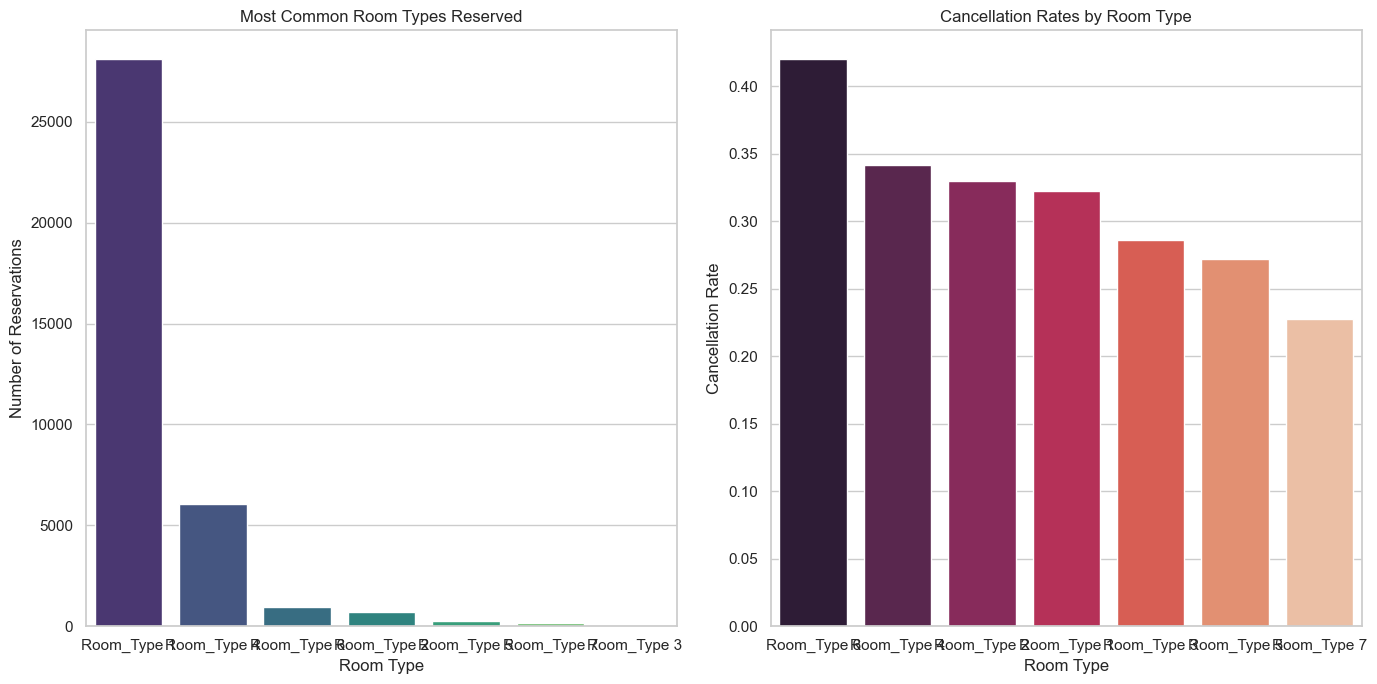

room_type_reserved
Room_Type 6    0.420290
Room_Type 4    0.341588
Room_Type 2    0.329480
Room_Type 1    0.322503
Room_Type 3    0.285714
Room_Type 5    0.271698
Room_Type 7    0.227848
Name: is_canceled, dtype: float64

In [94]:
room_type_counts = df['room_type_reserved'].value_counts()
df['is_canceled'] = (df['booking_status'] == 'Canceled').astype(int) #cancellation rate for each room type
room_type_cancellation_rates = df.groupby('room_type_reserved')['is_canceled'].mean().sort_values(ascending=False) #mean cancellation rate for room types


plt.figure(figsize=(14, 7))
#chart for common room types
plt.subplot(1, 2, 1)
room_type_counts_plot = sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette="viridis")
plt.title('Most Common Room Types Reserved')
plt.xlabel('Room Type')
plt.ylabel('Number of Reservations')

#chart for cancellation rates by room types
plt.subplot(1, 2, 2)
room_type_cancellation_rates_plot = sns.barplot(x=room_type_cancellation_rates.index, y=room_type_cancellation_rates.values, palette="rocket")
plt.title('Cancellation Rates by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate')

plt.tight_layout()
plt.show()
room_type_cancellation_rates

The most common room type reserved is Room_Type 1, with 25,000+ reservations.
The least common is Room_Type 3.
Room_Type 6 has the highest cancellation rate at approximately 40% above.
Room_Type 7 has the lowest cancellation rate.
Room_Type 1, despite being the most reserved, has a cancellation rate of around 32.25%, which is not the highest among the room types.

Question 5: Are repeat guests more or less likely to cancel their bookings than first-time guests?
answer this. description and visual 

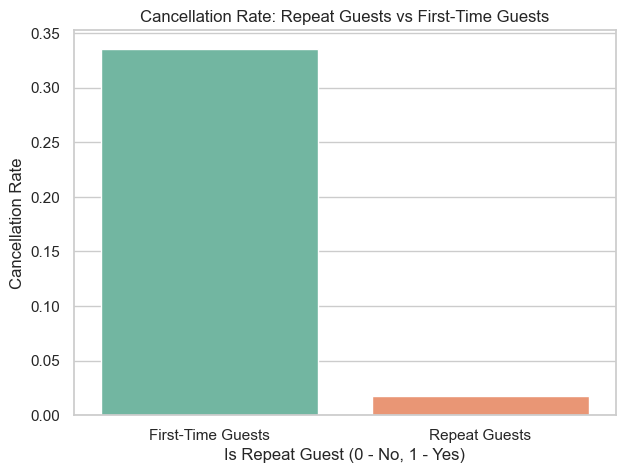

repeated_guest
0    0.335804
1    0.017204
Name: is_canceled, dtype: float64

In [89]:
repeat_guest_cancellation_rate = df.groupby('repeated_guest')['is_canceled'].mean()
plt.figure(figsize=(7, 5))
repeat_guest_cancellation_rate_plot = sns.barplot(x=repeat_guest_cancellation_rate.index, y=repeat_guest_cancellation_rate.values, palette="Set2")
plt.title('Cancellation Rate: Repeat Guests vs First-Time Guests')
plt.xlabel('Is Repeat Guest (0 - No, 1 - Yes)')
plt.ylabel('Cancellation Rate')
plt.xticks([0, 1], ['First-Time Guests', 'Repeat Guests'])
plt.show()
repeat_guest_cancellation_rate

Repeat guests are significantly less likely to cancel their bookings, with a cancellation rate of approximately 1.72%.
First-time guests have a much higher cancellation rate of around 33.58%.

Question 6: Can we visually analyze the proportion of bookings that required a car parking space and resulted in a cancellation?

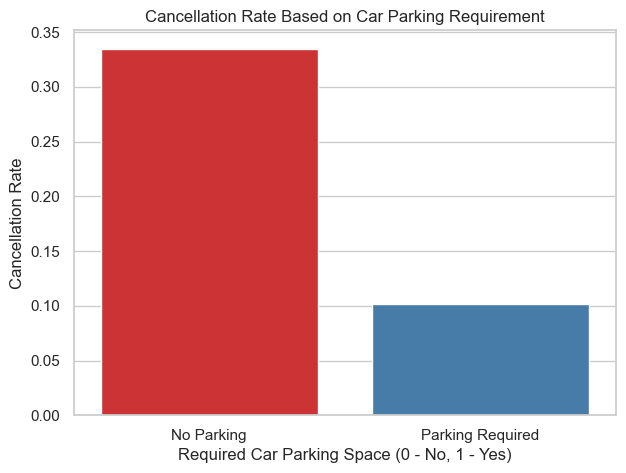

required_car_parking_space
0    0.334870
1    0.101423
Name: is_canceled, dtype: float64

In [90]:
parking_cancellation_proportion = df.groupby('required_car_parking_space')['is_canceled'].mean() #bookings that required a car parking space and canceled
plt.figure(figsize=(7, 5))
parking_cancellation_proportion_plot = sns.barplot(x=parking_cancellation_proportion.index, y=parking_cancellation_proportion.values, palette="Set1")
plt.title('Cancellation Rate Based on Car Parking Requirement')
plt.xlabel('Required Car Parking Space (0 - No, 1 - Yes)')
plt.ylabel('Cancellation Rate')
plt.xticks([0, 1], ['No Parking', 'Parking Required'])
plt.show()
parking_cancellation_proportion

Bookings that did not require a car parking space have a higher cancellation rate.
Bookings that required a car parking space have a significantly lower cancellation rate, suggesting that guests who need parking are less likely to cancel their bookings. 

Question 7: What are the patterns of average room prices over different months of the year, and how can this be graphically represented?

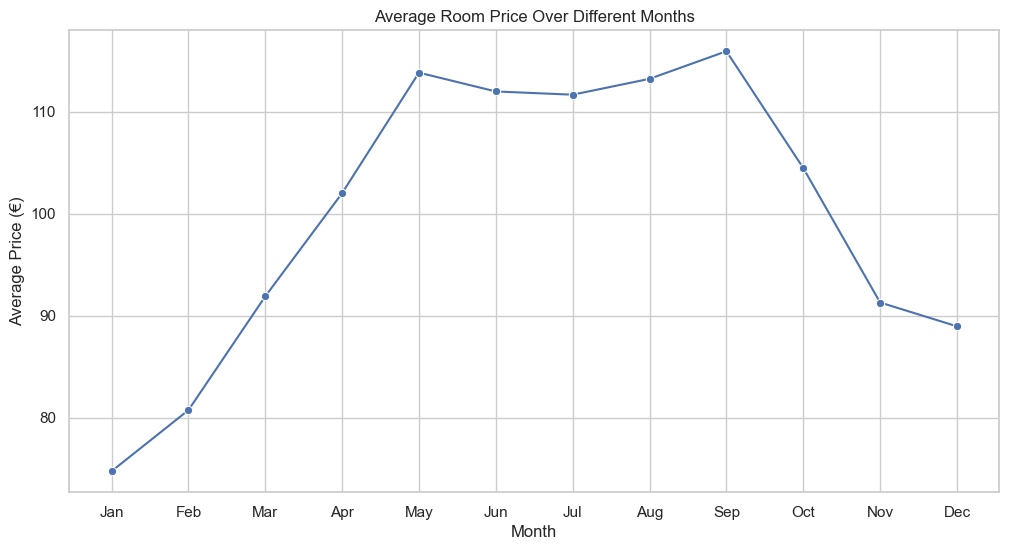

arrival_month
1      74.749763
2      80.733644
3      91.883698
4     101.998801
5     113.810677
6     111.966500
7     111.649318
8     113.203984
9     115.906916
10    104.460873
11     91.285426
12     88.952185
Name: avg_price_per_room, dtype: float64

In [91]:
avg_price_per_month = df.groupby('arrival_month')['avg_price_per_room'].mean().sort_index()
plt.figure(figsize=(12, 6))
avg_price_per_month_plot = sns.lineplot(x=avg_price_per_month.index, y=avg_price_per_month.values, marker='o')
plt.title('Average Room Price Over Different Months')
plt.xlabel('Month')
plt.ylabel('Average Price (€)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
avg_price_per_month

Prices tend to rise starting from January, peaking around September.
The highest average price is observed in September.
After September, there is a noticeable decrease in average prices towards the end of the year. Room prices are likely influenced by factors such as holidays, events, and overall demand, which tend to vary throughout the year.

Question 8: Are there any noticeable trends in the number of previous cancellations and the likelihood of a future cancellation, and how can we visualize this?

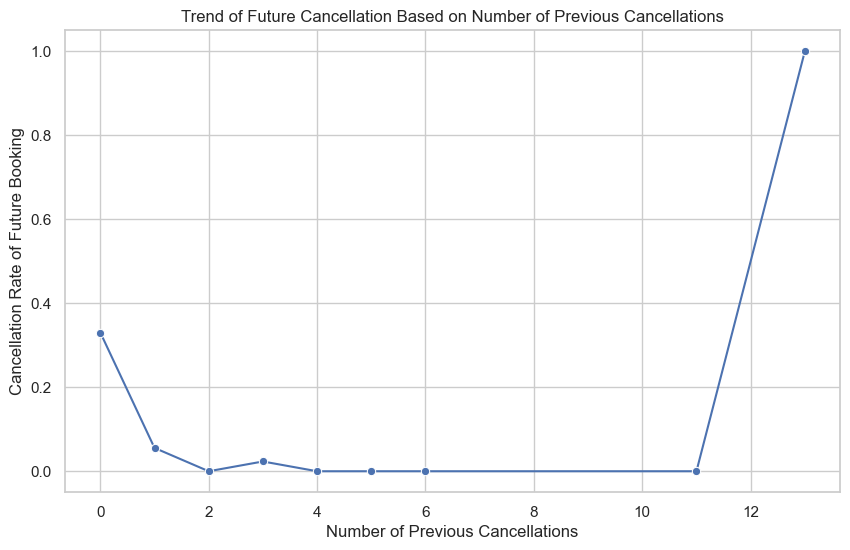

,no_of_previous_cancellations,is_canceled
0,0,0.330272
1,1,0.055556
2,2,0.000000
3,3,0.023256
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,11,0.000000
8,13,1.000000


In [92]:
prev_cancellations_trend = df.groupby('no_of_previous_cancellations')['is_canceled'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=prev_cancellations_trend, x='no_of_previous_cancellations', y='is_canceled', marker='o')
plt.title('Trend of Future Cancellation Based on Number of Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Cancellation Rate of Future Booking')
plt.show()
prev_cancellations_trend

This pattern suggests that room prices are higher during the spring and early summer months, possibly due to increased demand during this period. Prices drop towards the winter months, which may indicate a lower demand or off-season pricing strategies. 

Question 9: Can we create a visual comparison of the average number of special requests by room type reserved?

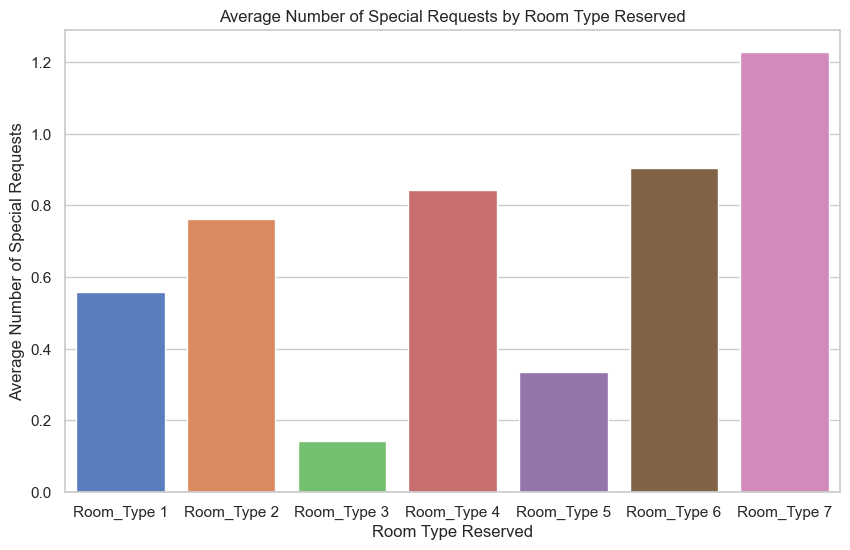

In [69]:
special_requests_by_room_type = df.groupby('room_type_reserved')['no_of_special_requests'].mean()
plt.figure(figsize=(10, 6))
special_requests_by_room_type_plot = sns.barplot(x=special_requests_by_room_type.index, y=special_requests_by_room_type.values, palette="muted")
plt.title('Average Number of Special Requests by Room Type Reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Average Number of Special Requests')
plt.show()

this plot shows that certain room types may be associated with a higher or lower average number of special requests, potentially reflecting the preferences or needs of guests choosing those types.

Question 10: Can we visualize the confusion matrices for both the KNN and Decision Tree models to compare their performance in terms of true positives, false positives, false negatives, and true negatives?

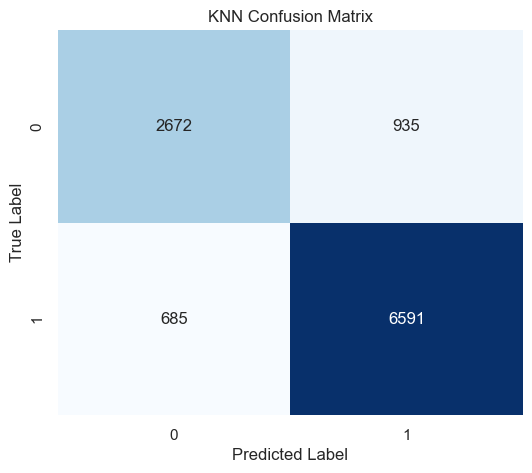

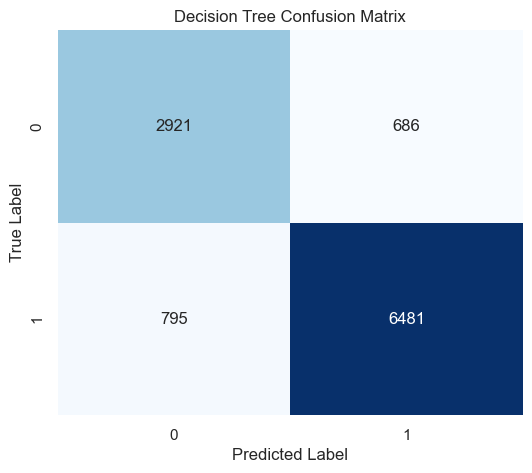

In [71]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_dt = confusion_matrix(y_test, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Plotting confusion matrices
plot_confusion_matrix(conf_matrix_knn, 'KNN Confusion Matrix')
plot_confusion_matrix(conf_matrix_dt, 'Decision Tree Confusion Matrix')

Both models are better at predicting cancellations (TP) than correctly identifying non-cancellations (TN).
The Decision Tree model has fewer false positives (FP) than the KNN model, indicating it is less likely to incorrectly predict a booking as canceled.
Conversely, the KNN model has fewer false negatives (FN) than the Decision Tree model, suggesting it is better at catching cancellations.
Overall, the KNN model has predicted more true positives and true negatives than the Decision Tree model, showing that it has a higher overall accuracy.

Question 11: Can we create a visual comparison of cross-validation scores for both models to assess their generalization ability?

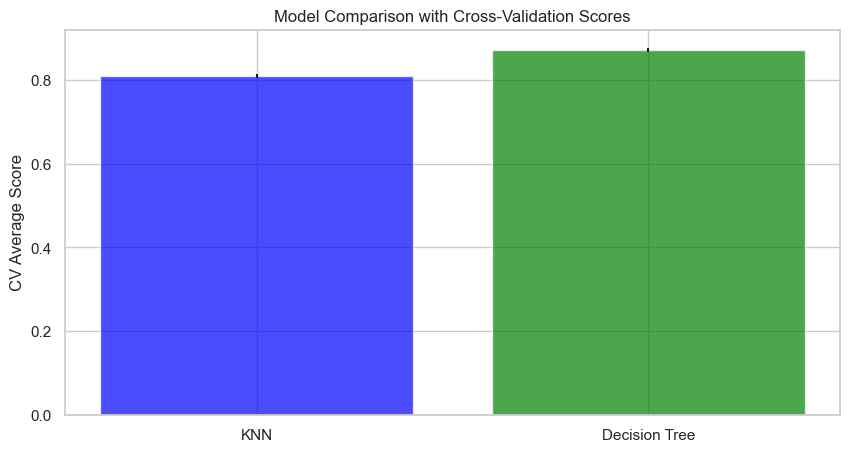

In [97]:
from sklearn.model_selection import cross_val_score

#10-fold cross-validation
cv_scores_knn = cross_val_score(knn, X, y, cv=10)
cv_scores_dt = cross_val_score(decision_tree, X, y, cv=10)
plt.figure(figsize=(10, 5))
models = ['KNN', 'Decision Tree']
cv_scores = [cv_scores_knn.mean(), cv_scores_dt.mean()]
cv_std = [cv_scores_knn.std(), cv_scores_dt.std()]
plt.bar(models, cv_scores, yerr=cv_std, alpha=0.7, color=['blue', 'green'])
plt.ylabel('CV Average Score')
plt.title('Model Comparison with Cross-Validation Scores')
plt.show()

we can observe that the Decision Tree model has a higher cross-validation score compared to the KNN model. This suggests that the Decision Tree may have better generalization performance on this dataset.



Question 12: What is the frequency of different room types being reserved by market segment, and can this be represented in a visual format?

<Figure size 1400x800 with 0 Axes>

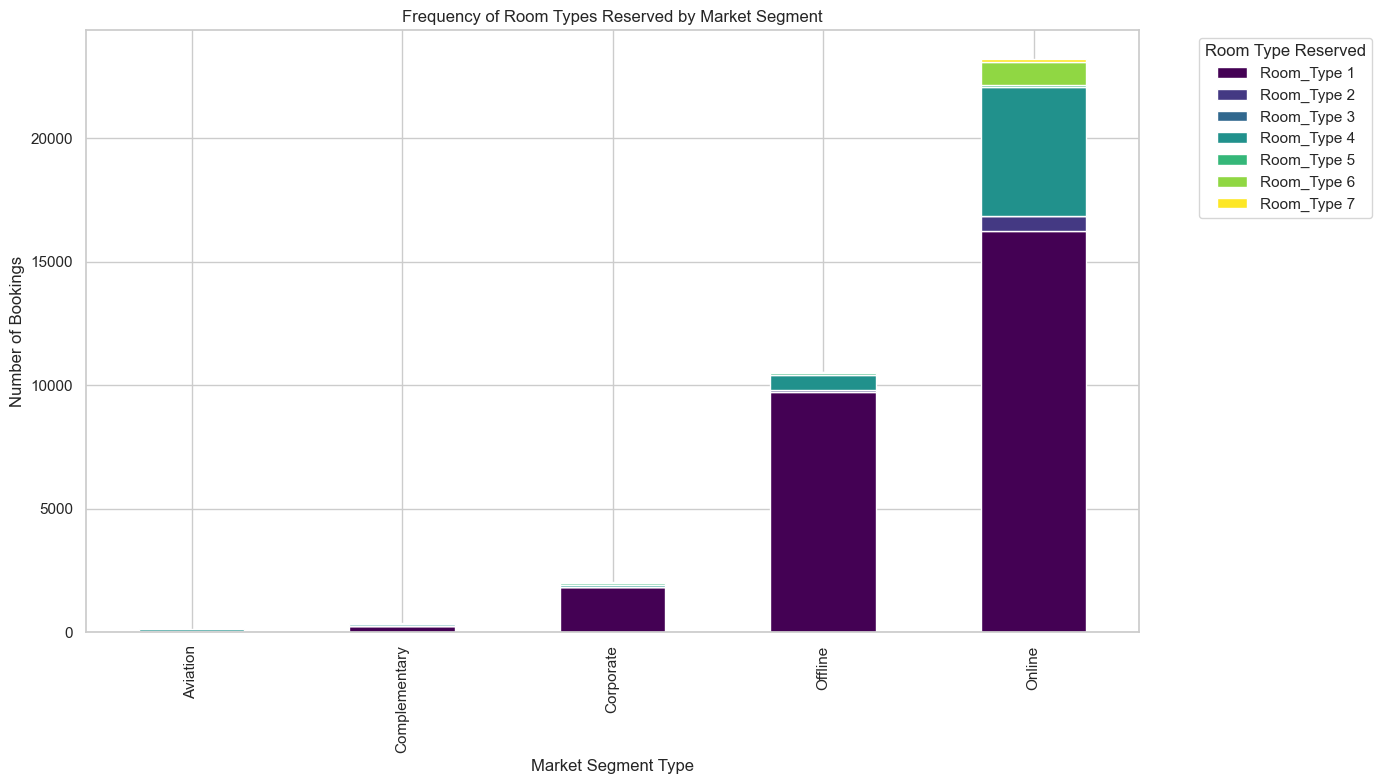

In [98]:
room_market_segment = df.groupby(['market_segment_type', 'room_type_reserved']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
room_market_segment.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Frequency of Room Types Reserved by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Room Type Reserved', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

The 'Online' market segment has the highest number of bookings compared to other segments, showing that online channels are the most popular for booking rooms. Within the 'Online' market segment, Room_Type 1 is the most commonly reserved, as indicated by its significant proportion in the stacked bar. This suggests that Room_Type 1 might be a standard or economical option that is preferred by online customers.

Question 13: How does the requirement for car parking space influence the average stay length (weekend plus week nights), and can we depict this association graphically?

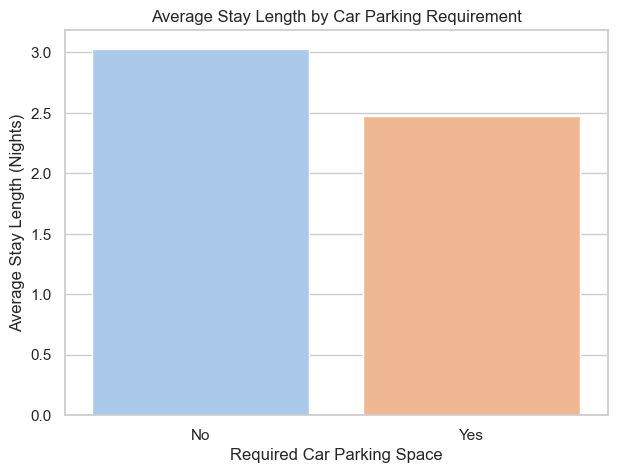

In [99]:
df['total_stay_length'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
avg_stay_length_by_parking = df.groupby('required_car_parking_space')['total_stay_length'].mean()
plt.figure(figsize=(7, 5))
avg_stay_length_by_parking_plot = sns.barplot(x=avg_stay_length_by_parking.index, y=avg_stay_length_by_parking.values, palette="pastel")
plt.title('Average Stay Length by Car Parking Requirement')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Average Stay Length (Nights)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

there is an association between requiring a car parking space and a longer hotel stay. Guests who need parking tend to stay longer, which could imply that they may be traveling by car and, as such, might be staying longer due to the nature of their travel

Question 14: Can we explore and visualize if there is a correlation between the average number of children in a booking and the length of stay?

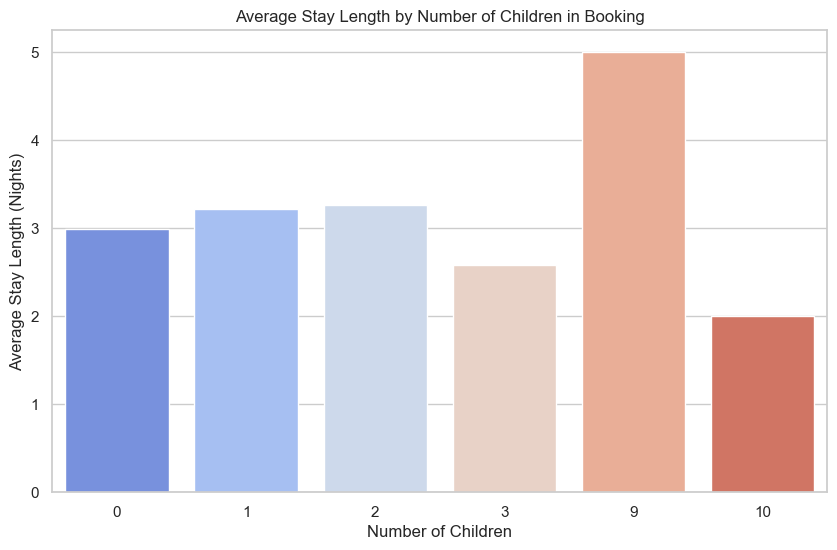

,no_of_children,total_stay_length
0,0,2.997081
1,1,3.224351
2,2,3.269376
3,3,2.578947
4,9,5.000000
5,10,2.000000


In [100]:
df['total_stay_length'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
avg_stay_length_by_children = df.groupby('no_of_children')['total_stay_length'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='no_of_children', y='total_stay_length', data=avg_stay_length_by_children, palette="coolwarm")
plt.title('Average Stay Length by Number of Children in Booking')
plt.xlabel('Number of Children')
plt.ylabel('Average Stay Length (Nights)')
plt.show()
avg_stay_length_by_children

Bookings with a small number of children do not differ in stay length from those with no children. Families with three children might plan longer stays, which could be indicative of extended family vacations.
The peak for nine children could suggest a special scenario, such as a larger family gathering or event-related stay, which typically involves longer bookings.The drop for ten children could be an outlier due to the small sample size or specific circumstances affecting those particular bookings.

Question 15: How does the booking cancellation rate vary with the number of nights originally booked, and can we depict this pattern graphically?

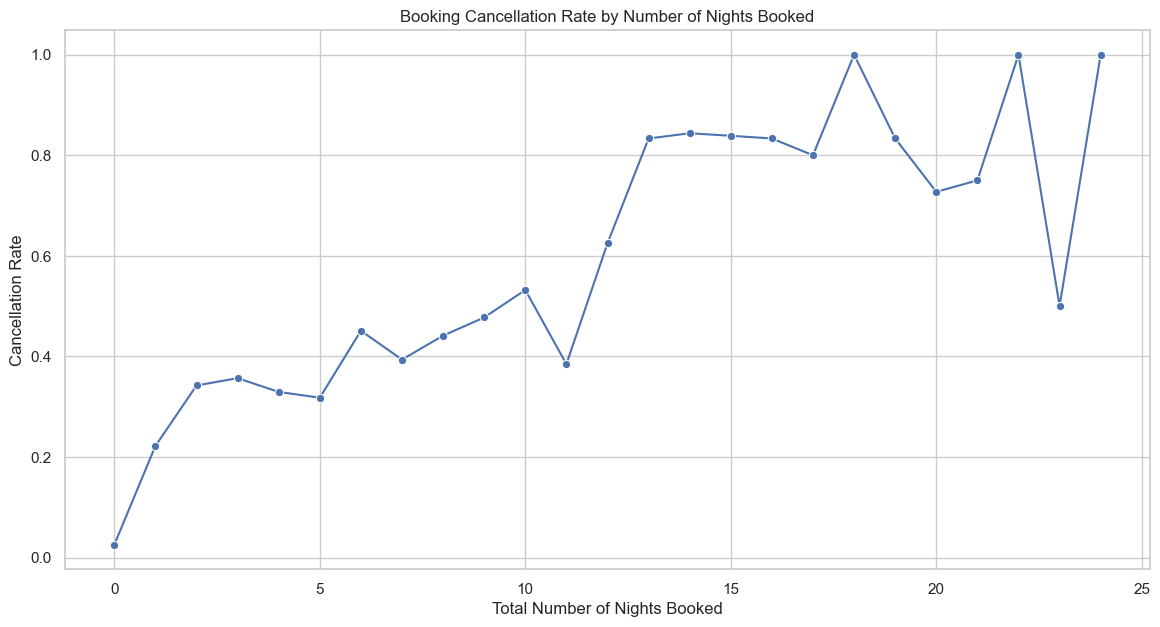

,total_nights,is_canceled
0,0,0.025641
1,1,0.221987
2,2,0.342186
3,3,0.356745
4,4,0.329374
5,5,0.317883
6,6,0.451018
7,7,0.393628
8,8,0.441341
9,9,0.477477


In [101]:
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['is_canceled'] = (df['booking_status'] == 'Canceled').astype(int)
cancellation_rate_by_nights = df.groupby('total_nights')['is_canceled'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='total_nights', y='is_canceled', data=cancellation_rate_by_nights, marker='o')
plt.title('Booking Cancellation Rate by Number of Nights Booked')
plt.xlabel('Total Number of Nights Booked')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()
cancellation_rate_by_nights 

For shorter stays (up to around 10 nights), the cancellation rate generally increases with the number of nights booked. This shows that as the length of stay increases, the likelihood of plans changing also increases.
There is a peak in cancellation rates for stays of around 10 to 15 nights, suggesting a higher uncertainty or change in plans for bookings of this length.
Beyond 15 nights, the cancellation rate shows more functuation with sharp increases and decreases. This could be due to a smaller sample size for longer bookings, making the data more likely to fluctuate, or it might reflect specific circumstances affecting these longer stays.